In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import sklearn.metrics as metrics

I will begin by importing the train and test data, concatenating, cleaning the

In [2]:
house = pd.read_csv('../datasets/train.csv')
house.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [3]:
house_test = pd.read_csv('../datasets/test.csv')
house_test.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [4]:
house['data_type'] = 'train'
house_test['data_type'] = 'test'

In [5]:
frames = [house, house_test]
df = pd.concat(frames)

In [6]:
print(house.shape)
print(house_test.shape)
print(df.shape)

(2051, 82)
(878, 81)
(2929, 82)


In [8]:
features_house = ['Garage Area', 'MS Zoning', 'Lot Area', 'Neighborhood', 'Mo Sold', 'Yr Sold', 'Overall Qual', 
            'Year Remod/Add', 'SalePrice', 'data_type']

In [9]:
df = df[features_house]

In [356]:
df = pd.get_dummies(df, columns = ['MS Zoning', 'Neighborhood', 'Mo Sold', 'Yr Sold', 'Year Remod/Add'])

In [357]:
df = df[df['Garage Area'].notnull()]

In [359]:
df_test = df[df['data_type'] == 'test']
df_test.shape

(878, 118)

In [360]:
df_train = df[df['data_type'] == 'train']
df_train.shape

(2050, 118)

In [361]:
df_train.head(2)

,Garage Area,Lot Area,Overall Qual,SalePrice,data_type,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,...,Year Remod/Add_2001,Year Remod/Add_2002,Year Remod/Add_2003,Year Remod/Add_2004,Year Remod/Add_2005,Year Remod/Add_2006,Year Remod/Add_2007,Year Remod/Add_2008,Year Remod/Add_2009,Year Remod/Add_2010
0,475.0,13517,6,130500.0,train,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,559.0,11492,7,220000.0,train,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [362]:
y = df_train['SalePrice']
X = df_train.drop(columns = ['SalePrice', 'data_type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

mse_train = metrics.mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print("rmse_train: ", rmse_train)

mse_test = metrics.mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print("rmse_test: ", rmse_test)

cv_scores = cross_val_score(lr, X, y, cv=5).mean()
print('cv =', cv_scores)

rmse_train:  35638.527617365486
rmse_test:  38771.00441356071
cv = 0.7553168639366048


In [363]:
df_test.shape

(878, 118)

In [364]:
X_final = df_test.drop(columns = ['SalePrice', 'data_type'])

In [365]:
X_final.head()

,Garage Area,Lot Area,Overall Qual,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,...,Year Remod/Add_2001,Year Remod/Add_2002,Year Remod/Add_2003,Year Remod/Add_2004,Year Remod/Add_2005,Year Remod/Add_2006,Year Remod/Add_2007,Year Remod/Add_2008,Year Remod/Add_2009,Year Remod/Add_2010
0,440.0,9142,6,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,580.0,9662,5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,426.0,17104,7,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,480.0,8520,5,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,514.0,9500,6,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [366]:
SalePrice = lr.predict(X_final)

In [367]:
SalePrice.shape

(878,)

In [368]:
house_test.shape

(878, 81)

In [369]:
Answer = pd.DataFrame(house_test['Id'])

In [372]:
#Answer = pd.DataFrame(house_test['Id'])
#Answer.drop(df.tail(1).index,inplace=True)
Answer['SalePrice'] = SalePrice
Answer.tail()

,Id,SalePrice
873,1662,177080.372968
874,1234,182956.934640
875,1373,116231.661281
876,1672,115712.074085
877,1939,130019.617324


In [378]:
Answer.to_csv('../datasets/submit_1.csv')

In [389]:
check = pd.read_csv('../datasets/submit_1.csv')

In [390]:
check.drop(columns = 'Unnamed: 0', inplace = True)

In [391]:
check.shape

(878, 2)

In [392]:
check.to_csv('../datasets/submit_1.csv', index = False)

In [393]:
check2 = pd.read_csv('../datasets/submit_1.csv')

In [395]:
check2.shape

(878, 2)

In [381]:
check.head()

,Unnamed: 0,Id,SalePrice
0,0,2658,133104.299690
1,1,2718,127250.965375
2,2,2414,222519.788560
3,3,1989,142880.159166
4,4,625,165988.535724


In [373]:
Answer.shape

(878, 2)

In [374]:
Answer.head()

,Id,SalePrice
0,2658,133104.299690
1,2718,127250.965375
2,2414,222519.788560
3,1989,142880.159166
4,625,165988.535724


In [377]:
house_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,data_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,test
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,test
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,test
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,test
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,185,0,NaN,NaN,NaN,0,7,2009,WD,test


In [330]:
house_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,data_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,test
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,test
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,test
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,test
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,185,0,NaN,NaN,NaN,0,7,2009,WD,test


In [321]:
sample = pd.read_csv('../datasets/sample_sub_reg.csv')

In [322]:
sample.shape

(878, 2)

In [323]:
sample.head()

,Id,SalePrice
0,2,181479.1217
1,4,181479.1217
2,6,181479.1217
3,7,181479.1217
4,17,181479.1217


In [248]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [199]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [200]:
# check nulls

for i in house.columns:
    if house[i].isnull().sum() > 0:
        print(f'{i} = {house[i].isnull().sum()}')

Lot Frontage = 330
Alley = 1911
Mas Vnr Type = 22
Mas Vnr Area = 22
Bsmt Qual = 55
Bsmt Cond = 55
Bsmt Exposure = 58
BsmtFin Type 1 = 55
BsmtFin SF 1 = 1
BsmtFin Type 2 = 56
BsmtFin SF 2 = 1
Bsmt Unf SF = 1
Total Bsmt SF = 1
Bsmt Full Bath = 2
Bsmt Half Bath = 2
Fireplace Qu = 1000
Garage Type = 113
Garage Yr Blt = 114
Garage Finish = 114
Garage Cars = 1
Garage Area = 1
Garage Qual = 114
Garage Cond = 114
Pool QC = 2042
Fence = 1651
Misc Feature = 1986


In [209]:
X = New_house[features]

y = New_house['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

mse_train = metrics.mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
rmse_train

mse_test = metrics.mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
rmse_test

cv_scores = cross_val_score(lr, X, y).mean()

In [221]:
cv_scores.mean()

1.0

In [82]:
X.head(2)

,Garage Area,Lot Area,Overall Qual,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,...,Year Remod/Add_2001,Year Remod/Add_2002,Year Remod/Add_2003,Year Remod/Add_2004,Year Remod/Add_2005,Year Remod/Add_2006,Year Remod/Add_2007,Year Remod/Add_2008,Year Remod/Add_2009,Year Remod/Add_2010
0,475.0,13517,6,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,559.0,11492,7,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
house.shape

(0, 81)

In [31]:
house['SalePrice'].sort_values()

1628     12789
183      13100
1309     34900
1292     35000
1518     35311
         ...  
151     556581
1796    582933
1692    584500
1964    591587
1671    611657
Name: SalePrice, Length: 2051, dtype: int64

best predictors = continuous


MSSubClass: building class
# MSZoning: general zoning classification
LotFrontage: Linear feet of street connected to property
# LotArea: Lot size in square feet
Street: Type of road access to property
Alley: Type of alley access to property
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
# Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
# OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
# MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale

In [33]:
house.shape

(2051, 81)

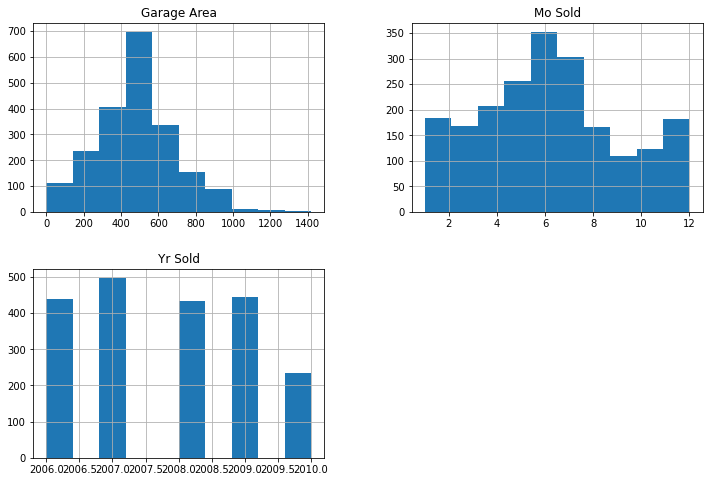

In [27]:
house.hist(column = ['Yr Sold', 'Mo Sold', 'Garage Area', 'Fireplace Qu'], figsize=(12,8));

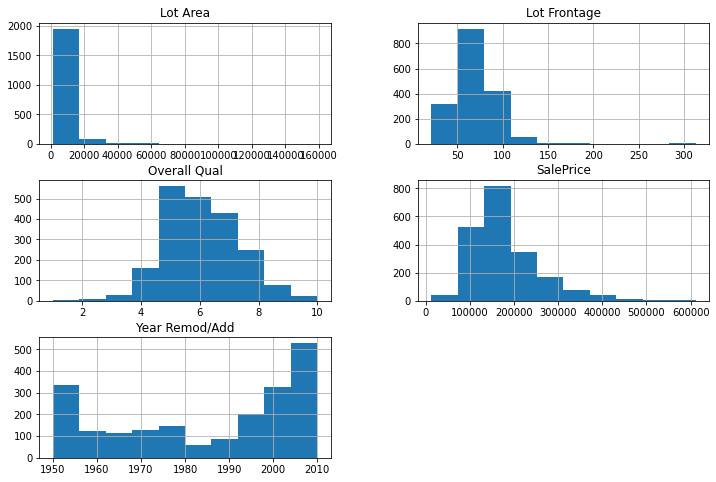

In [13]:
house.hist(column = ['SalePrice', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Remod/Add'], figsize=(12,8));

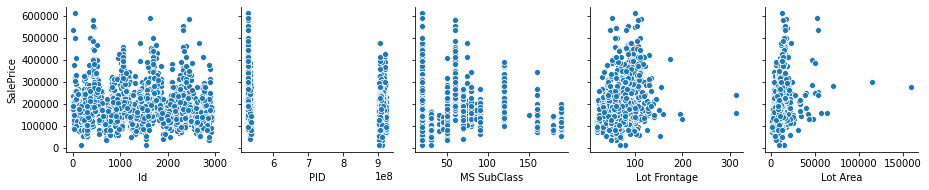

In [19]:
sns.pairplot(house, x_vars = ['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area'], y_vars = ['SalePrice']);

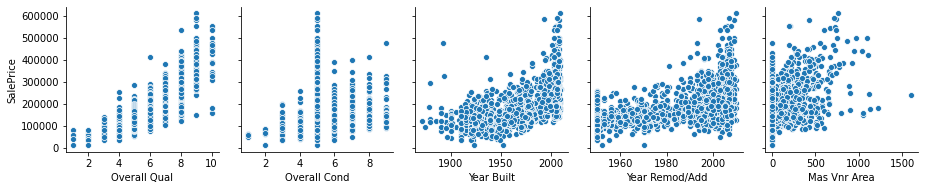

In [20]:
sns.pairplot(house, x_vars = ['Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area'], y_vars = ['SalePrice']);

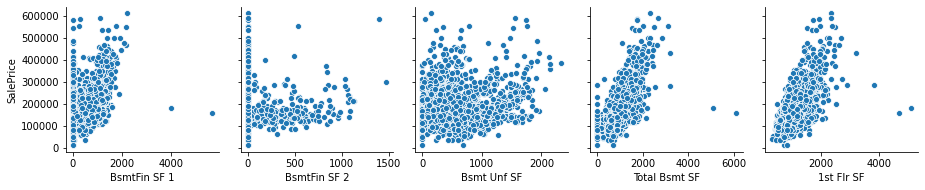

In [21]:
sns.pairplot(house, x_vars = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF'], y_vars = ['SalePrice']);

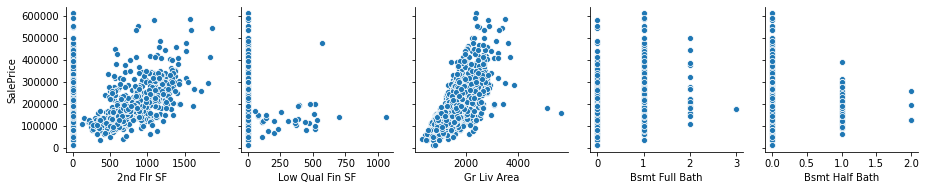

In [22]:
sns.pairplot(house, x_vars = ['2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath'], y_vars = ['SalePrice']);

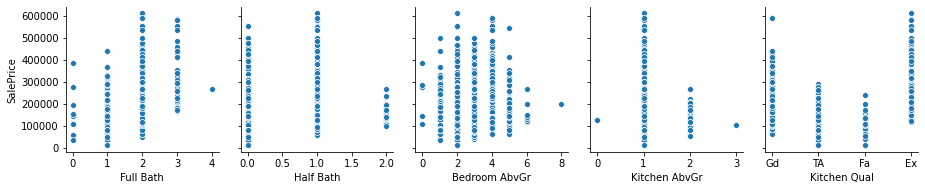

In [23]:
sns.pairplot(house, x_vars = ['Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual'], y_vars = ['SalePrice']);

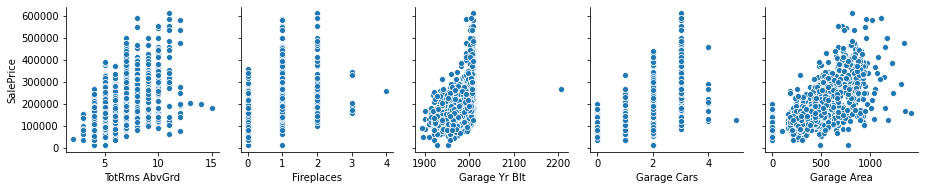

In [24]:
sns.pairplot(house, x_vars = ['TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area'], y_vars = ['SalePrice']);

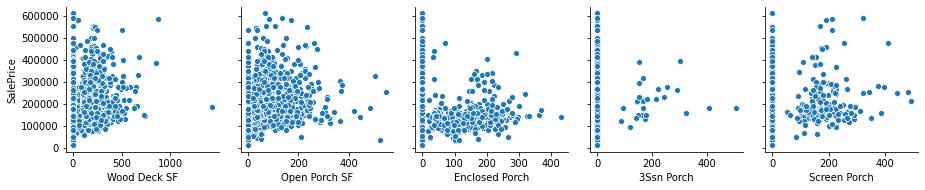

In [25]:
sns.pairplot(house, x_vars = ['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch'], y_vars = ['SalePrice']);

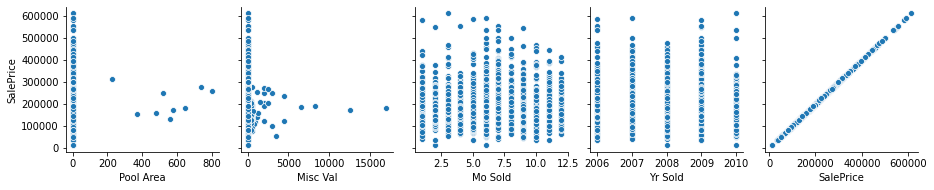

In [26]:
sns.pairplot(house, x_vars = ['Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'], y_vars = ['SalePrice']);

In [68]:
house = house[house['Garage Area'].notnull()]

In [77]:
features = ['Mo Sold', 'Garage Area', 'Overall Qual']
X = house[features]
y = house['SalePrice']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [85]:
lr = LinearRegression()
lr.fit(X_train, y_train)

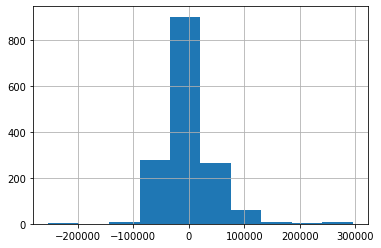

In [90]:
y_pred = lr.predict(X_train)
residuals = y_train - y_pred
residuals.hist()

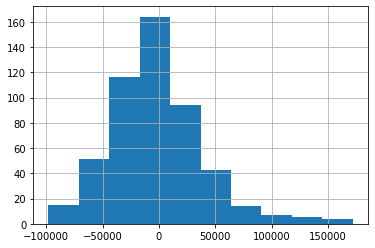

In [91]:
y_pred2 = lr.predict(X_test)
residuals = y_test - y_pred2
residuals.hist()

In [80]:
lr.score(X_train, y_train)

0.680823396203307

In [81]:
lr.score(X_test, y_test)

0.7482353602804525

In [84]:
cross_val_score(lr, X_train, y_train, cv = 5).mean()

0.6771736515445361

In [72]:
house_test = pd.read_csv('../datasets/test.csv')

In [74]:
X_test = house_test[features]
y_pred = lr.predict(X_test)

In [ ]:
mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)